<a href="https://colab.research.google.com/github/Gangadhar-katchala/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [ ]:
stock='BHEL.NS'
data=yf.download(stock,start,end)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS
Date,,,,,,
2005-01-05,38.784210,50.506664,52.926666,48.333332,51.733334,7113990
2005-01-06,37.803856,49.230000,51.033333,48.666664,48.666664,4965495
2005-01-07,37.788490,49.209999,49.993332,49.006664,49.933334,4945650
2005-01-10,37.942085,49.410000,50.386665,48.866665,48.866665,3511905
2005-01-11,37.770576,49.186665,50.660000,48.540001,49.403332,4609335


In [ ]:
data.shape

(4935, 6)

In [ ]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS,BHEL.NS
count,4935.000000,4935.000000,4935.000000,4935.000000,4935.000000,4.935000e+03
mean,124.736081,145.159340,147.880500,142.717979,145.461513,1.558686e+07
std,71.582763,87.592733,89.048163,86.294122,87.846184,2.481710e+07
min,19.628664,19.850000,20.200001,18.400000,20.000000,0.000000e+00
25%,68.068806,73.275002,74.699997,71.974998,73.334999,4.878738e+06
50%,106.713951,124.900002,127.300003,122.663330,124.966667,8.070220e+06
75%,164.053734,193.026665,197.783333,188.166664,193.166664,1.599845e+07
max,332.420746,382.693329,390.666656,374.973328,384.626678,5.101389e+08


In [ ]:
data.isna().sum()

,,0
Price,Ticker,
Adj Close,BHEL.NS,0
Close,BHEL.NS,0
High,BHEL.NS,0
Low,BHEL.NS,0
Open,BHEL.NS,0
Volume,BHEL.NS,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def plot_graph(data,title):
    data.plot(alpha=0.7)
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title(title)
    plt.show()


In [ ]:
data.columns.get_level_values(0)

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

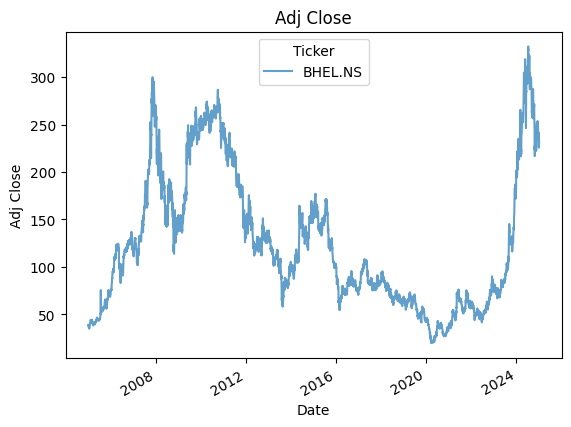

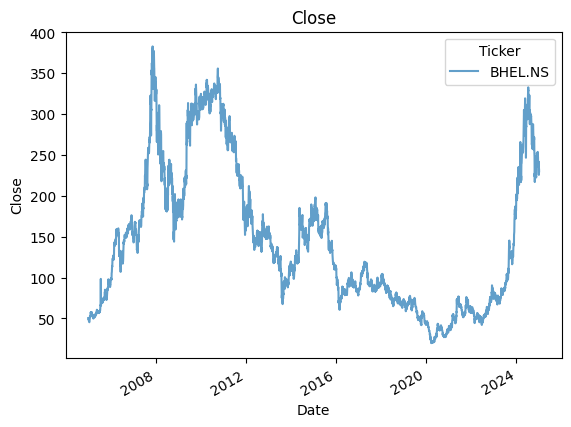

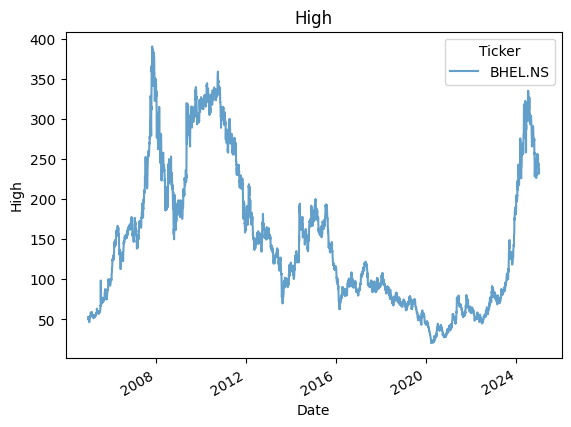

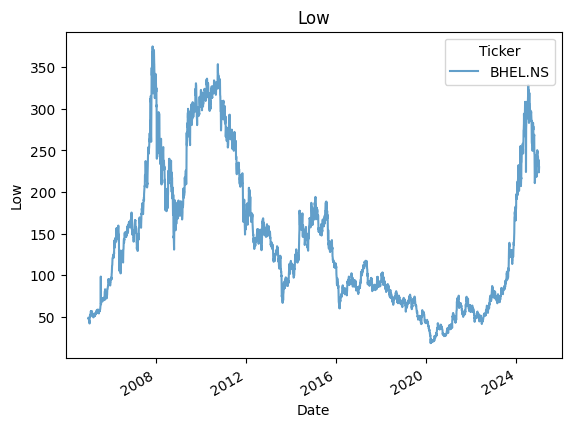

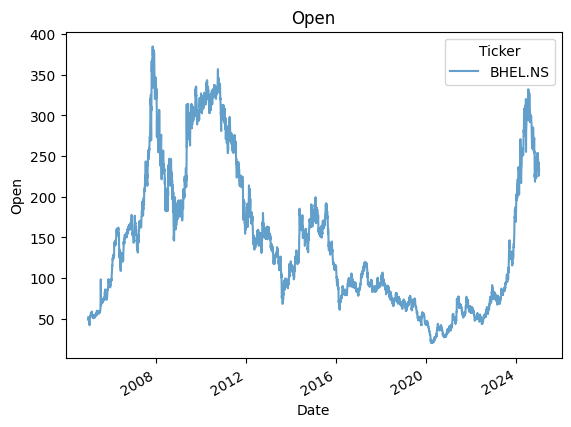

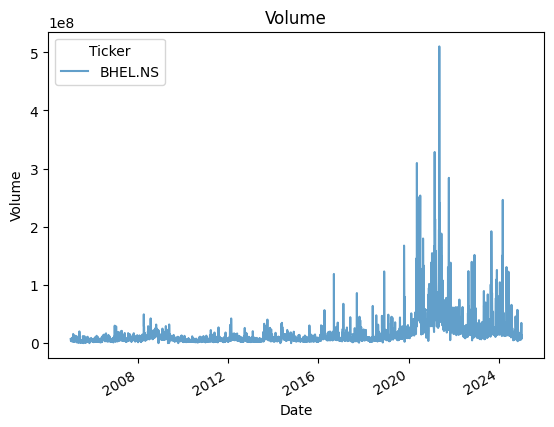

In [ ]:
for column_name in data.columns.get_level_values(0):
    plot_graph(data[column_name],column_name)

moving average


In [ ]:
start=data.index.year.min()
end=data.index.year.max()
for i in range(start,end):
  print(i,list(data.index.year).count(i))


2005 248
2006 247
2007 248
2008 246
2009 243
2010 250
2011 246
2012 245
2013 248
2014 244
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 246


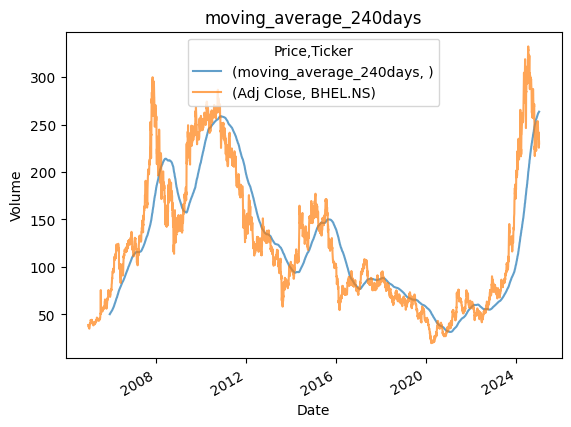

In [ ]:
data['moving_average_240days']=data['Adj Close'].rolling(window=240).mean()
plot_graph(data[['moving_average_240days','Adj Close']],'moving_average_240days')

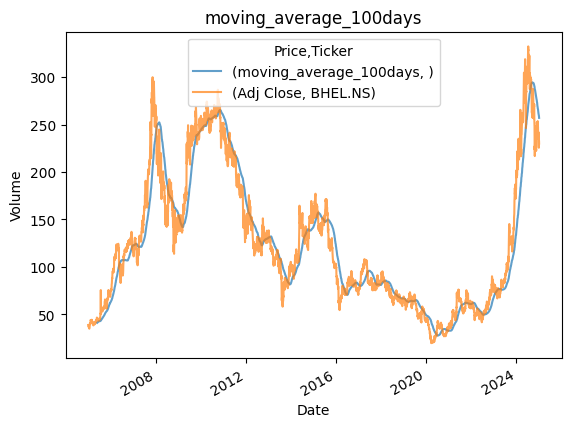

In [ ]:
data['moving_average_100days']=data['Adj Close'].rolling(window=100).mean()
plot_graph(data[['moving_average_100days','Adj Close']],'moving_average_100days')

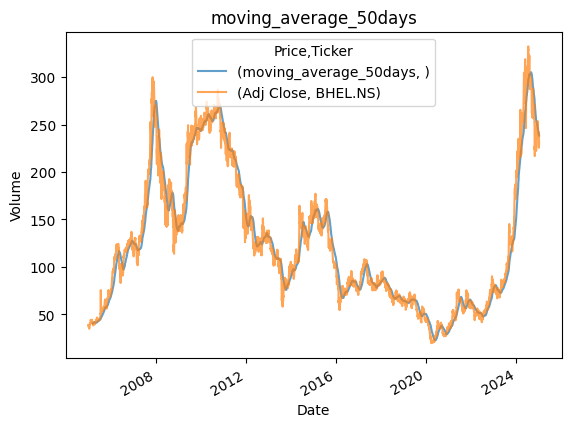

In [ ]:
data['moving_average_50days']=data['Adj Close'].rolling(window=50).mean()
plot_graph(data[['moving_average_50days','Adj Close']],'moving_average_50days')

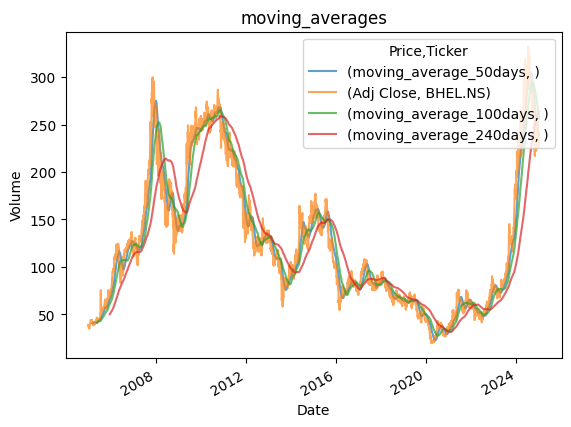

In [ ]:
plot_graph(data[['moving_average_50days','Adj Close','moving_average_100days','moving_average_240days']],'moving_averages')

In [ ]:
data['percent_change']=data['Adj Close'].pct_change()
data['percent_change'].head()

,percent_change
Date,
2005-01-05,NaN
2005-01-06,-0.025277
2005-01-07,-0.000406
2005-01-10,0.004065
2005-01-11,-0.004520


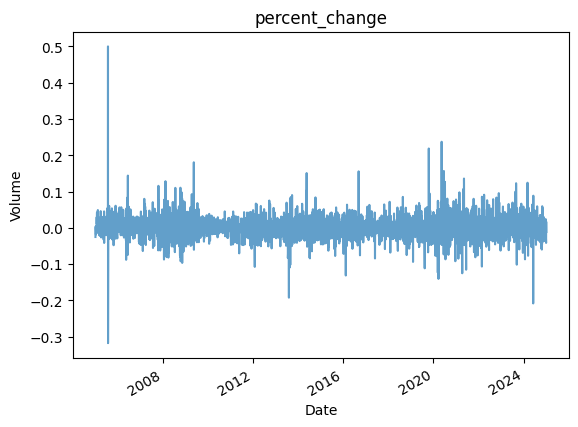

In [ ]:
plot_graph(data['percent_change'],'percent_change')

preprocessing


In [ ]:
Adj_Close_price=data['Adj Close']


In [ ]:
from sklearn .preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
Adj_Close_price=data['Adj Close']
scaled_data=scalar.fit_transform(Adj_Close_price.values.reshape(-1,1))
len(scaled_data)


4935

In [ ]:
x_data=[]
y_data=[]
for i in range(50,len(scaled_data)):
  x_data.append(scaled_data[i-50:i])
  y_data.append(scaled_data[i])
import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)
x_data[0],y_data[0]


(array([[0.06124051],
        [0.0581063 ],
        [0.05805718],
        [0.05854823],
        [0.05799991],
        [0.05694426],
        [0.05587227],
        [0.0536955 ],
        [0.05271348],
        [0.05083954],
        [0.05043039],
        [0.04998845],
        [0.04875277],
        [0.05083954],
        [0.05419468],
        [0.05534854],
        [0.06037307],
        [0.06125691],
        [0.06603593],
        [0.06759077],
        [0.06671513],
        [0.06510307],
        [0.06534855],
        [0.06811447],
        [0.07031584],
        [0.07134691],
        [0.07791813],
        [0.07658424],
        [0.07781171],
        [0.07786084],
        [0.07649423],
        [0.07472662],
        [0.07516851],
        [0.07426835],
        [0.07833549],
        [0.07845005],
        [0.07769715],
        [0.07598683],
        [0.07664156],
        [0.07678887],
        [0.07867099],
        [0.07705071],
        [0.07462843],
        [0.07310631],
        [0.07354822],
        [0

In [ ]:
spliiting_len=int(len(x_data)*0.7)
x_train,x_test=x_data[:spliiting_len],x_data[spliiting_len:]
y_train,y_test=y_data[:spliiting_len],y_data[spliiting_len:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 143s 41ms/step - loss: 0.0021
Epoch 2/2
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 132s 39ms/step - loss: 4.3593e-04


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)
predictions_values=scalar.inverse_transform(predictions)
predictions_values

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step


array([[ 63.832554],
       [ 61.643818],
       [ 59.21496 ],
       ...,
       [239.08113 ],
       [242.56552 ],
       [241.0555  ]], dtype=float32)

In [ ]:
y_values=scalar.inverse_transform(y_test)
y_values

array([[ 61.84676361],
       [ 59.378479  ],
       [ 59.98391342],
       ...,
       [233.22999573],
       [232.74000549],
       [230.05999756]])

In [ ]:
mse=np.sqrt(np.mean((predictions_values-y_values)**2))
mse

5.441039481400651

In [ ]:
import pandas as pd
plot_data=pd.DataFrame(
    {
        'actual':y_values.reshape(-1),
        'predictions':predictions_values.reshape(-1)
    },
    index=data.index[spliiting_len+50:]
)
plot_data.head()


,actual,predictions
Date,,
2019-01-25,61.846764,63.832554
2019-01-28,59.378479,61.643818
2019-01-29,59.983913,59.214958
2019-01-30,59.518196,59.437252
2019-01-31,60.263329,59.089211


In [ ]:
plot_data.columns

Index(['actual', 'predictions'], dtype='object')

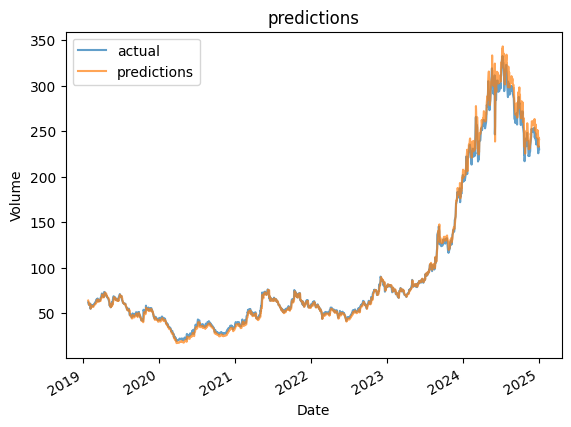

In [ ]:
plot_graph(plot_data,'predictions')

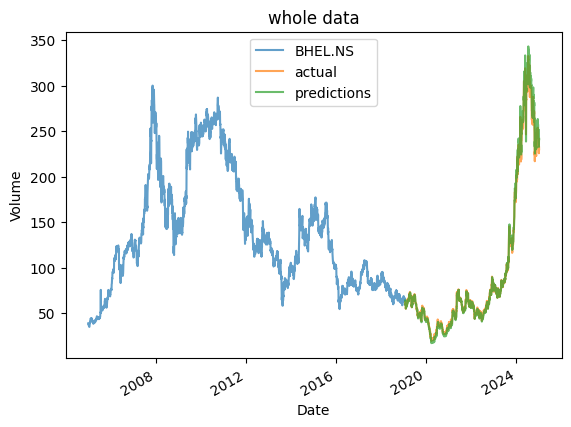

In [ ]:
Adj_Close_price=data['Adj Close']
plot_graph(pd.concat([Adj_Close_price[:spliiting_len+50],plot_data], axis=0), 'whole data')

In [ ]:
model.save("stock_pricr_model.keras")

In [ ]:
import yfinance as yf
import numpy as np

# Assuming 'stock', 'scalar', 'scaled_data', and 'model' are already defined

latest_data = yf.download(stock, period="1d")
latest_close = latest_data['Adj Close'].values[-1]
latest_close_scaled = scalar.transform(latest_close.reshape(-1, 1))

input_sequence = np.concatenate((scaled_data[-49:], latest_close_scaled))
input_sequence = input_sequence.reshape(1, 50, 1)

predicted_scaled = model.predict(input_sequence)
predicted_price = scalar.inverse_transform(predicted_scaled)[0][0]

print(f"Predicted price for {stock} tomorrow: {predicted_price}")


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted price for BHEL.NS tomorrow: 238.4255828857422


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date, timedelta

def predict_future_price(target_date_str):
    target_date = pd.to_datetime(target_date_str)
    latest_data = yf.download(stock, start=date.today() - timedelta(days=365), end=target_date - timedelta(days=1))
    latest_close = latest_data['Adj Close'].values[-1]
    latest_close = latest_close.reshape(1, 1)
    latest_close_scaled = scalar.transform(latest_close)
    input_sequence = scaled_data[-49:].reshape(1, 49, 1)
    latest_close_scaled = latest_close_scaled.reshape(1, 1, 1)
    input_sequence = np.append(input_sequence, latest_close_scaled, axis=1)
    predicted_scaled = model.predict(input_sequence)
    predicted_price = scalar.inverse_transform(predicted_scaled)[0][0]
    print(f"Predicted price for {stock} on {target_date_str}: {predicted_price}")

predict_future_price("2025-01-05")

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted price for BHEL.NS on 2025-01-05: 238.4255828857422
